In [2]:
!pip install pandas
!pip install matplotlib
!pip install xlrd==1.2.0
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np
import re as re
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [4]:
bakery_df = pd.read_csv("Bakery_sales.csv")
bakery_df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,1/2/2021,8:38,150040,BAGUETTE,1,"0,90 €"
1,1,1/2/2021,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €"
2,4,1/2/2021,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €"
3,5,1/2/2021,9:14,150041,PAIN,1,"1,15 €"
4,8,1/2/2021,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €"


In [5]:
dates_df = pd.read_csv("special_days.csv")
dates_df.head(14)

,date,day,holiday
0,1/1/2021,Fri,New Year's Day
1,4/2/2021,Fri,Good Friday
2,4/5/2021,Mon,Easter Monday
3,5/1/2021,Sat,Labour Day
4,5/8/2021,Sat,Victory Day
5,5/13/2021,Thu,Ascension Day
6,5/23/2021,Sun,Whit Sunday
7,5/24/2021,Mon,Whit Monday
8,7/14/2021,Wed,Bastille Day
9,8/15/2021,Sun,Assumption Day


In [6]:
dates_df['date'] = pd.to_datetime(dates_df['date'])
dates_df['date'].head(5)

0   2021-01-01
1   2021-04-02
2   2021-04-05
3   2021-05-01
4   2021-05-08
Name: date, dtype: datetime64[ns]

In [7]:
bakery_df['date'] = pd.to_datetime(bakery_df['date'])
bakery_df['date'].head(5)

0   2021-01-02
1   2021-01-02
2   2021-01-02
3   2021-01-02
4   2021-01-02
Name: date, dtype: datetime64[ns]

In [8]:
dates_df.head

<bound method NDFrame.head of          date  day            holiday
0  2021-01-01  Fri     New Year's Day
1  2021-04-02  Fri       Good Friday 
2  2021-04-05  Mon      Easter Monday
3  2021-05-01  Sat         Labour Day
4  2021-05-08  Sat        Victory Day
5  2021-05-13  Thu      Ascension Day
6  2021-05-23  Sun        Whit Sunday
7  2021-05-24  Mon        Whit Monday
8  2021-07-14  Wed       Bastille Day
9  2021-08-15  Sun     Assumption Day
10 2021-11-01  Mon    All Saints' Day
11 2021-11-11  Thu      Armistice Day
12 2021-12-25  Sat      Christmas Day
13 2021-12-26  Sun  St Stephen's Day >

In [9]:
merged_df = pd.merge(bakery_df, dates_df, on='date', how='right')
merged_df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,day,holiday
0,NaN,2021-01-01,NaN,NaN,NaN,NaN,NaN,Fri,New Year's Day
1,52344.0,2021-04-02,7:38,164264.0,FORMULE SANDWICH,2.0,"6,50 €",Fri,Good Friday
2,52347.0,2021-04-02,7:50,164265.0,PAIN AU CHOCOLAT,1.0,"1,20 €",Fri,Good Friday
3,52348.0,2021-04-02,7:50,164265.0,BAGUETTE,1.0,"0,90 €",Fri,Good Friday
4,52351.0,2021-04-02,7:51,164266.0,COOKIE,1.0,"1,00 €",Fri,Good Friday
...,...,...,...,...,...,...,...,...,...
6951,281867.0,2021-12-26,12:56,226255.0,BOULE 400G,1.0,"1,50 €",Sun,St Stephen's Day
6952,281868.0,2021-12-26,12:56,226255.0,DIVERS BOULANGERIE,1.0,"6,00 €",Sun,St Stephen's Day
6953,281871.0,2021-12-26,12:58,226256.0,PAIN BANETTE,1.0,"1,40 €",Sun,St Stephen's Day
6954,281874.0,2021-12-26,13:00,226257.0,SPECIAL BREAD,1.0,"2,40 €",Sun,St Stephen's Day


In [10]:
merged_df1 = merged_df.rename(columns = {'Unnamed: 0': 'article_id', 'Quantity': 'Sales Quantity'})
merged_df1

,article_id,date,time,ticket_number,article,Sales Quantity,unit_price,day,holiday
0,NaN,2021-01-01,NaN,NaN,NaN,NaN,NaN,Fri,New Year's Day
1,52344.0,2021-04-02,7:38,164264.0,FORMULE SANDWICH,2.0,"6,50 €",Fri,Good Friday
2,52347.0,2021-04-02,7:50,164265.0,PAIN AU CHOCOLAT,1.0,"1,20 €",Fri,Good Friday
3,52348.0,2021-04-02,7:50,164265.0,BAGUETTE,1.0,"0,90 €",Fri,Good Friday
4,52351.0,2021-04-02,7:51,164266.0,COOKIE,1.0,"1,00 €",Fri,Good Friday
...,...,...,...,...,...,...,...,...,...
6951,281867.0,2021-12-26,12:56,226255.0,BOULE 400G,1.0,"1,50 €",Sun,St Stephen's Day
6952,281868.0,2021-12-26,12:56,226255.0,DIVERS BOULANGERIE,1.0,"6,00 €",Sun,St Stephen's Day
6953,281871.0,2021-12-26,12:58,226256.0,PAIN BANETTE,1.0,"1,40 €",Sun,St Stephen's Day
6954,281874.0,2021-12-26,13:00,226257.0,SPECIAL BREAD,1.0,"2,40 €",Sun,St Stephen's Day


In [11]:
merged_df1.columns=merged_df1.columns.str.upper()
merged_df1

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
0,NaN,2021-01-01,NaN,NaN,NaN,NaN,NaN,Fri,New Year's Day
1,52344.0,2021-04-02,7:38,164264.0,FORMULE SANDWICH,2.0,"6,50 €",Fri,Good Friday
2,52347.0,2021-04-02,7:50,164265.0,PAIN AU CHOCOLAT,1.0,"1,20 €",Fri,Good Friday
3,52348.0,2021-04-02,7:50,164265.0,BAGUETTE,1.0,"0,90 €",Fri,Good Friday
4,52351.0,2021-04-02,7:51,164266.0,COOKIE,1.0,"1,00 €",Fri,Good Friday
...,...,...,...,...,...,...,...,...,...
6951,281867.0,2021-12-26,12:56,226255.0,BOULE 400G,1.0,"1,50 €",Sun,St Stephen's Day
6952,281868.0,2021-12-26,12:56,226255.0,DIVERS BOULANGERIE,1.0,"6,00 €",Sun,St Stephen's Day
6953,281871.0,2021-12-26,12:58,226256.0,PAIN BANETTE,1.0,"1,40 €",Sun,St Stephen's Day
6954,281874.0,2021-12-26,13:00,226257.0,SPECIAL BREAD,1.0,"2,40 €",Sun,St Stephen's Day


In [12]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6956 entries, 0 to 6955
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ARTICLE_ID      6955 non-null   float64       
 1   DATE            6956 non-null   datetime64[ns]
 2   TIME            6955 non-null   object        
 3   TICKET_NUMBER   6955 non-null   float64       
 4   ARTICLE         6955 non-null   object        
 5   SALES QUANTITY  6955 non-null   float64       
 6   UNIT_PRICE      6955 non-null   object        
 7   DAY             6956 non-null   object        
 8   HOLIDAY         6956 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 543.4+ KB


In [13]:
merged_df1.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6951    False
6952    False
6953    False
6954    False
6955    False
Length: 6956, dtype: bool>

In [14]:
missing_values = merged_df1.isnull()
missing_values.head()

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
0,True,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [15]:
 for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("") 

ARTICLE_ID
False    6955
True        1
Name: ARTICLE_ID, dtype: int64

DATE
False    6956
Name: DATE, dtype: int64

TIME
False    6955
True        1
Name: TIME, dtype: int64

TICKET_NUMBER
False    6955
True        1
Name: TICKET_NUMBER, dtype: int64

ARTICLE
False    6955
True        1
Name: ARTICLE, dtype: int64

SALES QUANTITY
False    6955
True        1
Name: SALES QUANTITY, dtype: int64

UNIT_PRICE
False    6955
True        1
Name: UNIT_PRICE, dtype: int64

DAY
False    6956
Name: DAY, dtype: int64

HOLIDAY
False    6956
Name: HOLIDAY, dtype: int64



In [16]:
merged_df2=merged_df1.dropna()
merged_df2

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
1,52344.0,2021-04-02,7:38,164264.0,FORMULE SANDWICH,2.0,"6,50 €",Fri,Good Friday
2,52347.0,2021-04-02,7:50,164265.0,PAIN AU CHOCOLAT,1.0,"1,20 €",Fri,Good Friday
3,52348.0,2021-04-02,7:50,164265.0,BAGUETTE,1.0,"0,90 €",Fri,Good Friday
4,52351.0,2021-04-02,7:51,164266.0,COOKIE,1.0,"1,00 €",Fri,Good Friday
5,52352.0,2021-04-02,7:51,164266.0,PAIN CHOCO AMANDES,2.0,"1,50 €",Fri,Good Friday
...,...,...,...,...,...,...,...,...,...
6951,281867.0,2021-12-26,12:56,226255.0,BOULE 400G,1.0,"1,50 €",Sun,St Stephen's Day
6952,281868.0,2021-12-26,12:56,226255.0,DIVERS BOULANGERIE,1.0,"6,00 €",Sun,St Stephen's Day
6953,281871.0,2021-12-26,12:58,226256.0,PAIN BANETTE,1.0,"1,40 €",Sun,St Stephen's Day
6954,281874.0,2021-12-26,13:00,226257.0,SPECIAL BREAD,1.0,"2,40 €",Sun,St Stephen's Day


In [17]:
merged_df2['SALES QUANTITY']=merged_df2['SALES QUANTITY'].abs()

C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\838564678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['SALES QUANTITY']=merged_df2['SALES QUANTITY'].abs()


In [18]:
columns_to_convert = ['ARTICLE_ID', 'TICKET_NUMBER', 'SALES QUANTITY']

merged_df2[columns_to_convert] = merged_df2[columns_to_convert].astype(int)

C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\4175407290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2[columns_to_convert] = merged_df2[columns_to_convert].astype(int)


In [19]:
from scipy.stats import stats
column_name='SALES QUANTITY'
z_scores = np.abs(stats.zscore(merged_df2[column_name]))
threshold = 3
num_outliers = len(np.where(z_scores > threshold)[0])
print("Number of outliers in", column_name, ":", num_outliers)

Number of outliers in SALES QUANTITY : 142


C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\1234283525.py:3: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_scores = np.abs(stats.zscore(merged_df2[column_name]))


In [20]:
merged_df2['SALES QUANTITY']=merged_df2['SALES QUANTITY'].abs()

C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\838564678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['SALES QUANTITY']=merged_df2['SALES QUANTITY'].abs()


In [21]:
enc = preprocessing.LabelEncoder()

for i in merged_df2.columns:
    if merged_df2[i].dtype == object:
        merged_df2[i] = enc.fit_transform(merged_df2[i])
    else:
        pass

C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\3313355785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2[i] = enc.fit_transform(merged_df2[i])
C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\3313355785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2[i] = enc.fit_transform(merged_df2[i])
C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\3313355785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [22]:
merged_df2

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
1,52344,2021-04-02,278,164264,40,2,39,0,7
2,52347,2021-04-02,289,164265,60,1,12,0,7
3,52348,2021-04-02,289,164265,0,1,7,0,7
4,52351,2021-04-02,290,164266,20,1,8,0,7
5,52352,2021-04-02,290,164266,63,2,16,0,7
...,...,...,...,...,...,...,...,...,...
6951,281867,2021-12-26,176,226255,7,1,16,3,9
6952,281868,2021-12-26,176,226255,27,1,38,3,9
6953,281871,2021-12-26,178,226256,62,1,15,3,9
6954,281874,2021-12-26,180,226257,79,1,27,3,9


In [23]:
correlation_matrix=merged_df2.corr()
print(correlation_matrix)

                ARTICLE_ID      TIME  TICKET_NUMBER   ARTICLE  SALES QUANTITY  \
ARTICLE_ID        1.000000 -0.040824       0.999994 -0.008511        0.031864   
TIME             -0.040824  1.000000      -0.040745 -0.045035        0.092640   
TICKET_NUMBER     0.999994 -0.040745       1.000000 -0.008618        0.031786   
ARTICLE          -0.008511 -0.045035      -0.008618  1.000000        0.117784   
SALES QUANTITY    0.031864  0.092640       0.031786  0.117784        1.000000   
UNIT_PRICE       -0.022076 -0.045344      -0.022156  0.270411       -0.079877   
DAY               0.164126  0.001560       0.164575  0.009167        0.014834   
HOLIDAY          -0.453822  0.043261      -0.453442 -0.027092        0.027954   

                UNIT_PRICE       DAY   HOLIDAY  
ARTICLE_ID       -0.022076  0.164126 -0.453822  
TIME             -0.045344  0.001560  0.043261  
TICKET_NUMBER    -0.022156  0.164575 -0.453442  
ARTICLE           0.270411  0.009167 -0.027092  
SALES QUANTITY   -0.07987

In [25]:
sales_by_date = merged_df2.groupby("DATE")["SALES QUANTITY"].sum() 
sales_by_date

DATE
2021-04-02     521
2021-04-05     720
2021-05-01     677
2021-05-08     810
2021-05-13    1053
2021-05-23    1336
2021-05-24    1003
2021-07-14    1145
2021-08-15    1765
2021-11-01     936
2021-11-11     530
2021-12-25     660
2021-12-26     735
Name: SALES QUANTITY, dtype: int32

In [26]:
average_sold_per_holiday = (merged_df2
    .groupby(['HOLIDAY', 'ARTICLE'])['SALES QUANTITY']
    .count() # sum of each article sold per day
    .reset_index()
    .groupby('ARTICLE')['SALES QUANTITY']
    .mean()
    .sort_values(ascending=False)
)
average_sold_per_holiday[:10]

ARTICLE
90    153.846154
21     51.769231
3      34.923077
0      31.384615
22     26.538462
60     24.769231
16     12.769231
79     12.153846
7      11.538462
94     10.818182
Name: SALES QUANTITY, dtype: float64

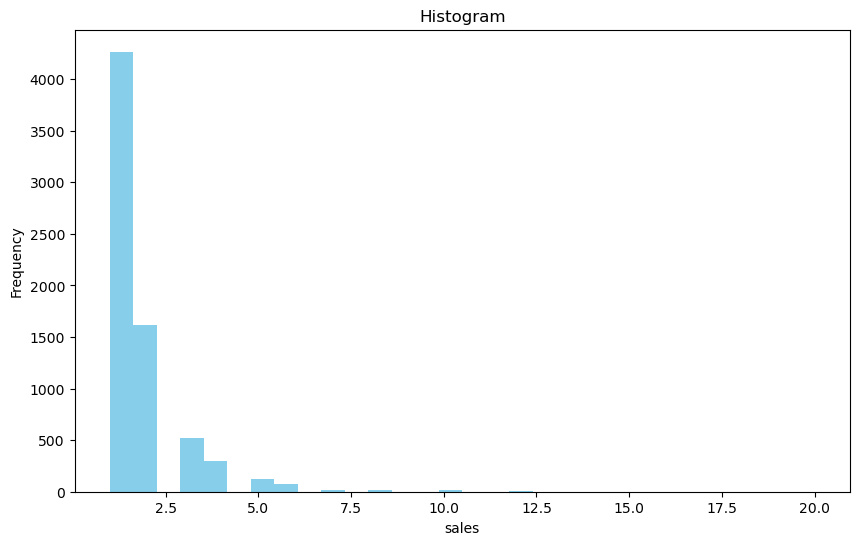

In [27]:
color = 'skyblue'

# Create the histogram with the custom color
plt.figure(figsize=(10, 6))
plt.hist(merged_df2['SALES QUANTITY'], bins=30, color=color)

# Adding labels and title
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

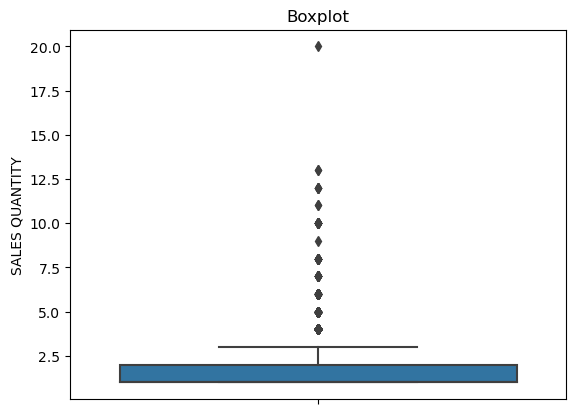

In [28]:
import seaborn as sns
sns.boxplot(data=merged_df2, y=column_name)
plt.title('Boxplot')
plt.show()

In [29]:
train1=merged_df2
scaler=MinMaxScaler()
scaler.fit(train1[['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','SALES QUANTITY','TICKET_NUMBER', 'UNIT_PRICE', 'TIME']])
(train1[['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','SALES QUANTITY','TICKET_NUMBER', 'UNIT_PRICE', 'TIME']])=scaler.transform(train1[['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','SALES QUANTITY','TICKET_NUMBER', 'UNIT_PRICE', 'TIME']])
train1

C:\Users\LIM\AppData\Local\Temp\ipykernel_4836\3497624249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (train1[['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','SALES QUANTITY','TICKET_NUMBER', 'UNIT_PRICE', 'TIME']])=scaler.transform(train1[['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','SALES QUANTITY','TICKET_NUMBER', 'UNIT_PRICE', 'TIME']])


,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
1,0.000000,2021-04-02,0.666667,0.000000,0.425532,0.052632,0.829787,0.0,0.583333
2,0.000013,2021-04-02,0.693046,0.000016,0.638298,0.000000,0.255319,0.0,0.583333
3,0.000017,2021-04-02,0.693046,0.000016,0.000000,0.000000,0.148936,0.0,0.583333
4,0.000030,2021-04-02,0.695444,0.000032,0.212766,0.000000,0.170213,0.0,0.583333
5,0.000035,2021-04-02,0.695444,0.000032,0.670213,0.052632,0.340426,0.0,0.583333
...,...,...,...,...,...,...,...,...,...
6951,0.999965,2021-12-26,0.422062,0.999968,0.074468,0.000000,0.340426,0.6,0.750000
6952,0.999970,2021-12-26,0.422062,0.999968,0.287234,0.000000,0.808511,0.6,0.750000
6953,0.999983,2021-12-26,0.426859,0.999984,0.659574,0.000000,0.319149,0.6,0.750000
6954,0.999996,2021-12-26,0.431655,1.000000,0.840426,0.000000,0.574468,0.6,0.750000


In [30]:
x = merged_df2.drop("SALES QUANTITY", axis=1)
y = ("SALES QUANTITY")

In [31]:
T_rows = int(0.8*(len(train1)))
print("80% of the total Rows is",T_rows)
train_df1 = merged_df2.sample(n=T_rows, random_state=37)
test_df1 = merged_df2.drop(train_df1.index)

80% of the total Rows is 5564


In [32]:
train_df1

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
5544,0.870153,2021-11-01,0.187050,0.869034,0.957447,0.000000,0.255319,0.2,0.000000
3956,0.382689,2021-07-14,0.047962,0.382721,0.925532,0.052632,0.531915,1.0,0.333333
6036,0.902166,2021-11-11,0.254197,0.901360,0.957447,0.052632,0.255319,0.8,0.083333
1081,0.104831,2021-05-01,0.194245,0.106076,0.957447,0.157895,0.255319,0.4,0.666667
2259,0.153631,2021-05-13,0.266187,0.154727,0.957447,0.000000,0.255319,0.8,0.166667
...,...,...,...,...,...,...,...,...,...
2909,0.185273,2021-05-23,0.244604,0.184682,0.872340,0.000000,0.042553,0.6,1.000000
1410,0.129490,2021-05-08,0.021583,0.130902,0.223404,0.000000,0.021277,0.4,0.833333
3835,0.381622,2021-07-14,0.947242,0.381721,0.223404,0.000000,0.021277,1.0,0.333333
605,0.016468,2021-04-05,0.124700,0.016034,0.000000,0.000000,0.148936,0.2,0.500000


In [33]:
test_df1

,ARTICLE_ID,DATE,TIME,TICKET_NUMBER,ARTICLE,SALES QUANTITY,UNIT_PRICE,DAY,HOLIDAY
7,0.000061,2021-04-02,0.707434,0.000065,0.234043,0.052632,0.212766,0.0,0.583333
16,0.000135,2021-04-02,0.733813,0.000129,0.957447,0.000000,0.255319,0.0,0.583333
17,0.000139,2021-04-02,0.733813,0.000129,0.638298,0.000000,0.255319,0.0,0.583333
25,0.000209,2021-04-02,0.769784,0.000194,0.234043,0.000000,0.212766,0.0,0.583333
46,0.000431,2021-04-02,0.810552,0.000436,0.095745,0.000000,0.765957,0.0,0.583333
...,...,...,...,...,...,...,...,...,...
6934,0.999821,2021-12-26,0.364508,0.999839,0.968085,0.052632,1.000000,0.6,0.750000
6942,0.999891,2021-12-26,0.393285,0.999903,0.840426,0.000000,0.574468,0.6,0.750000
6946,0.999917,2021-12-26,0.402878,0.999919,0.351064,0.052632,0.680851,0.6,0.750000
6949,0.999948,2021-12-26,0.410072,0.999952,0.000000,0.052632,0.148936,0.6,0.750000


In [34]:
# Separate input features and target variable
x_train=train_df1.loc[:,['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','TICKET_NUMBER', 'TIME', 'UNIT_PRICE']]
y_train=train_df1.loc[:,['SALES QUANTITY']]
x_test=test_df1.loc[:,['ARTICLE','ARTICLE_ID','HOLIDAY','DAY','TICKET_NUMBER', 'TIME', 'UNIT_PRICE']]
y_test=test_df1.loc[:,['SALES QUANTITY']]

In [35]:
!pip install xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor

In [36]:
rf_model_100 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=37)
rf_model_100.fit(x_train, y_train)

C:\Users\LIM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=37)

In [37]:
rf_100_preds = rf_model_100.predict(x_test)
rf_100_preds

array([0.03837717, 0.04507138, 0.0547427 , ..., 0.03697365, 0.02022497,
       0.01329637])

In [38]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_100_preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_100_preds))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rf_100_preds)))

Mean Squared Error: 0.004266808742369318
Mean Absolute Error: 0.039678498966219854
Root Mean Squared Error: 0.06532081400571581


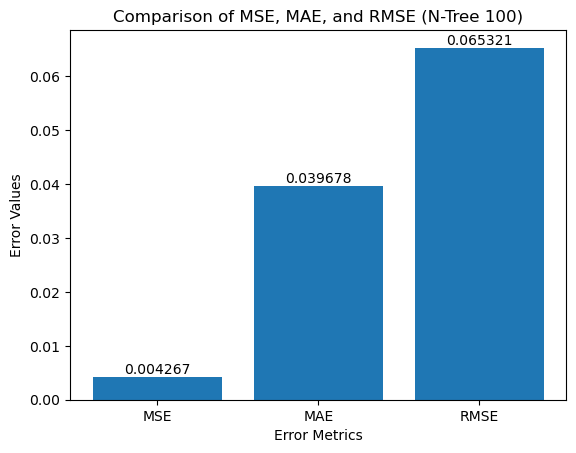

In [39]:
mse_rf_100 = metrics.mean_squared_error(y_test, rf_100_preds)
mae_rf_100 = metrics.mean_absolute_error(y_test, rf_100_preds)
rmse_rf_100 = np.sqrt(metrics.mean_squared_error(y_test, rf_100_preds))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_rf_100, mae_rf_100, rmse_rf_100]

# Create the bar chart
plt.bar(errors, error_values)

for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (N-Tree 100)')
plt.show()

In [40]:
rf_model_200 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=37)
rf_model_200.fit(x_train, y_train)

C:\Users\LIM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=37)

In [41]:
rf_model_400 = RandomForestRegressor(n_estimators=400, max_depth=10, random_state=37)
rf_model_400.fit(x_train, y_train)

C:\Users\LIM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=400, random_state=37)

In [42]:
rf_200_preds = rf_model_200.predict(x_test)
rf_200_preds

array([0.03617437, 0.03896361, 0.05350122, ..., 0.0366347 , 0.01971041,
       0.0125504 ])

In [43]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_200_preds))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_200_preds))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rf_200_preds)))

Mean Squared Error: 0.004236914846775873
Mean Absolute Error: 0.0396247893670327
Root Mean Squared Error: 0.06509158814144785


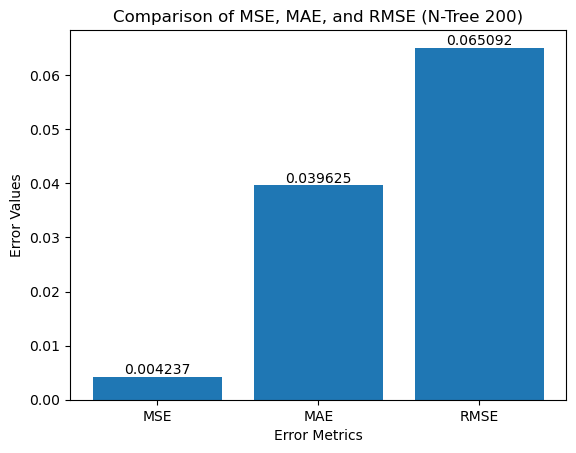

In [44]:
mse_rf_200 = metrics.mean_squared_error(y_test, rf_200_preds)
mae_rf_200 = metrics.mean_absolute_error(y_test, rf_200_preds)
rmse_rf_200 = np.sqrt(metrics.mean_squared_error(y_test, rf_200_preds))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_rf_200, mae_rf_200, rmse_rf_200]

# Create the bar chart
plt.bar(errors, error_values)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (N-Tree 200)')
plt.show()

In [45]:
rf_400_preds = rf_model_400.predict(x_test)
rf_400_preds

array([0.03685707, 0.04436511, 0.0535801 , ..., 0.03524801, 0.01793336,
       0.01238989])

In [75]:
print('Mean Squared Error (RF_400):', metrics.mean_squared_error(y_test, rf_400_preds))


Mean Squared Error (RF_400): 0.004224518358123325


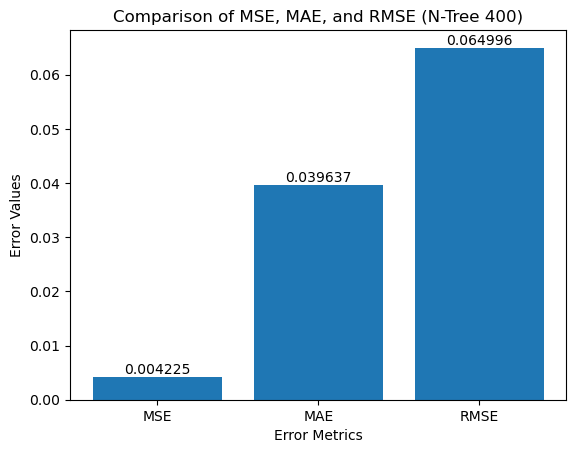

In [47]:
mse_rf_400 = metrics.mean_squared_error(y_test, rf_400_preds)
mae_rf_400 = metrics.mean_absolute_error(y_test, rf_400_preds)
rmse_rf_400 = np.sqrt(metrics.mean_squared_error(y_test, rf_400_preds))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_rf_400, mae_rf_400, rmse_rf_400]

# Create the bar chart
plt.bar(errors, error_values)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (N-Tree 400)')
plt.show()

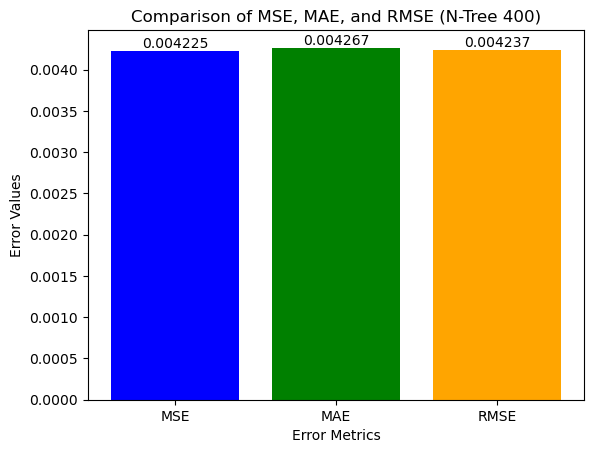

In [48]:
mse_rf_400 = metrics.mean_squared_error(y_test, rf_400_preds)
mse_rf_100 = metrics.mean_squared_error(y_test, rf_100_preds)
mse_rf_200 = metrics.mean_squared_error(y_test, rf_200_preds)

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_rf_400, mse_rf_100, mse_rf_200]

colors = ['blue', 'green', 'orange']

# Create the bar chart
plt.bar(errors, error_values, color=colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (N-Tree 400)')
plt.show()

In [49]:
xgb_Regressor_1000 = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb_Regressor_1000.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [50]:
xgb_prediction_1000 = xgb_Regressor_1000.predict(x_test)
xgb_prediction_1000

array([ 0.01857904,  0.00765452,  0.04837636, ...,  0.05889577,
       -0.00318043,  0.0039712 ], dtype=float32)

In [51]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_prediction_1000))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_prediction_1000))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction_1000)))

Mean Squared Error: 0.004619277732561534
Mean Absolute Error: 0.041799591352550236
Root Mean Squared Error: 0.06796526857565954


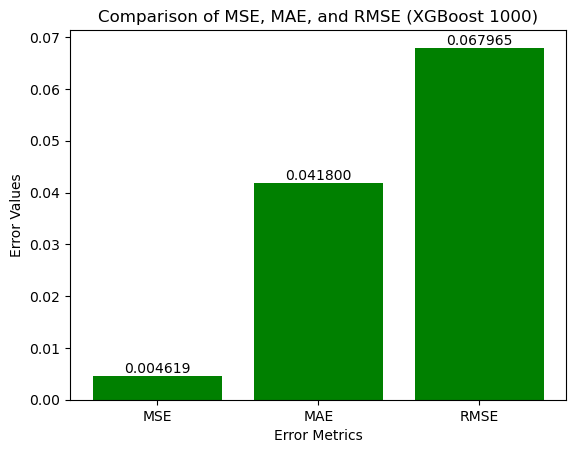

In [52]:
mse_xgb_1000 = metrics.mean_squared_error(y_test, xgb_prediction_1000)
mae_xgb_1000 = metrics.mean_absolute_error(y_test, xgb_prediction_1000)
rmse_xgb_1000 = np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction_1000))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_xgb_1000, mae_xgb_1000, rmse_xgb_1000]

colors = ['green']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (XGBoost 1000)')
plt.show()

In [53]:
xgb_Regressor_500 = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
xgb_Regressor_500.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [54]:
xgb_prediction_500 = xgb_Regressor_500.predict(x_test)
xgb_prediction_500

array([ 0.02145129,  0.00984294,  0.05168699, ...,  0.05039376,
       -0.0005533 ,  0.00602067], dtype=float32)

In [55]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_prediction_500))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_prediction_500))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction_500)))

Mean Squared Error: 0.00442790554162527
Mean Absolute Error: 0.04048652066285296
Root Mean Squared Error: 0.06654250928260273


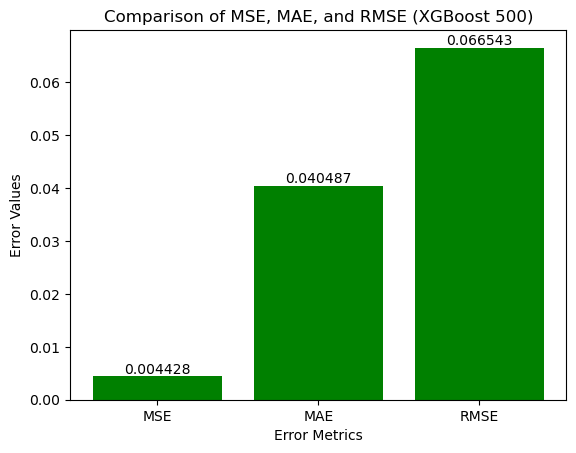

In [56]:
mse_xgb_500 = metrics.mean_squared_error(y_test, xgb_prediction_500)
mae_xgb_500 = metrics.mean_absolute_error(y_test, xgb_prediction_500)
rmse_xgb_500 = np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction_500))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_xgb_500, mae_xgb_500, rmse_xgb_500]

colors = ['green']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (XGBoost 500)')
plt.show()

In [57]:
xgb_Regressor_300 = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_Regressor_300.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
xgb_prediction_300 = xgb_Regressor_300.predict(x_test)
xgb_prediction_300

array([0.02175626, 0.01802292, 0.05234977, ..., 0.05008535, 0.004095  ,
       0.00479055], dtype=float32)

In [74]:
print('Mean Squared Error(XGB_300):', metrics.mean_squared_error(y_test, xgb_prediction_300))


Mean Squared Error(XGB_300): 0.004348972881753329


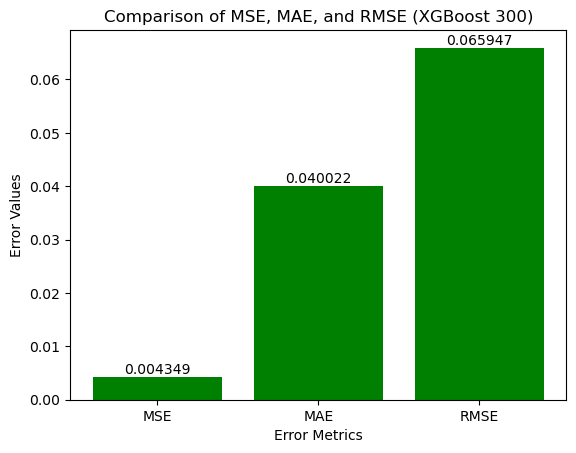

In [60]:
mse_xgb_300 = metrics.mean_squared_error(y_test, xgb_prediction_300)
mae_xgb_300 = metrics.mean_absolute_error(y_test, xgb_prediction_300)
rmse_xgb_300 = np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction_300))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_xgb_300, mae_xgb_300, rmse_xgb_300]

colors = ['green']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (XGBoost 300)')
plt.show()

In [61]:
ann_regressor = MLPRegressor(max_iter=100, random_state=42)
ann_regressor.fit(x_train, y_train)

C:\Users\LIM\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(max_iter=100, random_state=42)

In [62]:
ann_predictions = ann_regressor.predict(x_test)
ann_predictions


array([0.03582305, 0.06032101, 0.04505081, ..., 0.0074755 , 0.01678933,
       0.04580476])

In [76]:
print('Mean Squared Error (ANN):', metrics.mean_squared_error(y_test, ann_predictions))


Mean Squared Error (ANN): 0.005331421647804495


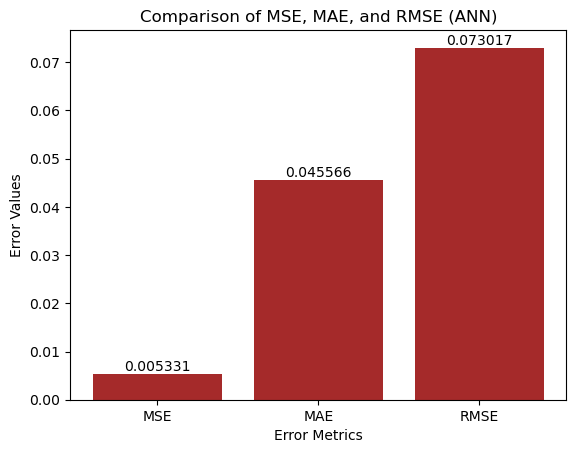

In [64]:
mse_ann = metrics.mean_squared_error(y_test, ann_predictions)
mae_ann = metrics.mean_absolute_error(y_test, ann_predictions)
rmse_ann = np.sqrt(metrics.mean_squared_error(y_test, ann_predictions))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_ann, mae_ann, rmse_ann]

colors = ['brown']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (ANN)')
plt.show()

In [65]:
hybrid_predictions = (rf_400_preds + ann_predictions)/2
hybrid_predictions

array([0.03634006, 0.05234306, 0.04931545, ..., 0.02136175, 0.01736134,
       0.02909732])

In [66]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, hybrid_predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, hybrid_predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, hybrid_predictions)))

Mean Squared Error: 0.004546690058442203
Mean Absolute Error: 0.04178174895526256
Root Mean Squared Error: 0.06742914843331631


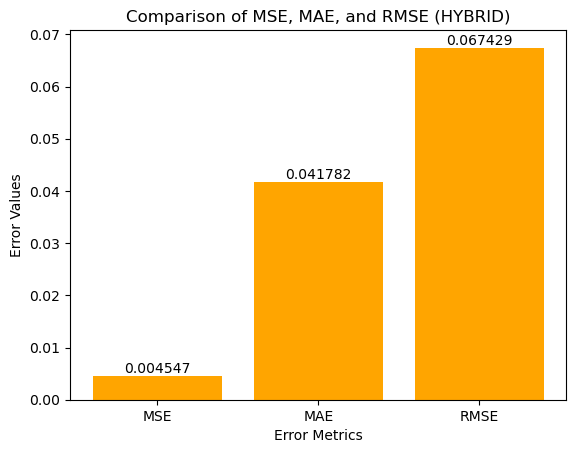

In [67]:
mse_hyb = metrics.mean_squared_error(y_test, hybrid_predictions)
mae_hyb = metrics.mean_absolute_error(y_test, hybrid_predictions)
rmse_hyb = np.sqrt(metrics.mean_squared_error(y_test, hybrid_predictions))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_hyb, mae_hyb, rmse_hyb]

colors = ['orange']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (HYBRID)')
plt.show()

In [68]:
hybrid_predictions1 = (rf_400_preds + xgb_prediction_300)/2
hybrid_predictions1

array([0.02930666, 0.03119401, 0.05296493, ..., 0.04266668, 0.01101418,
       0.00859022])

In [69]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, hybrid_predictions1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, hybrid_predictions1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, hybrid_predictions1)))

Mean Squared Error: 0.00417664702311692
Mean Absolute Error: 0.03931772801849159
Root Mean Squared Error: 0.0646269837074029


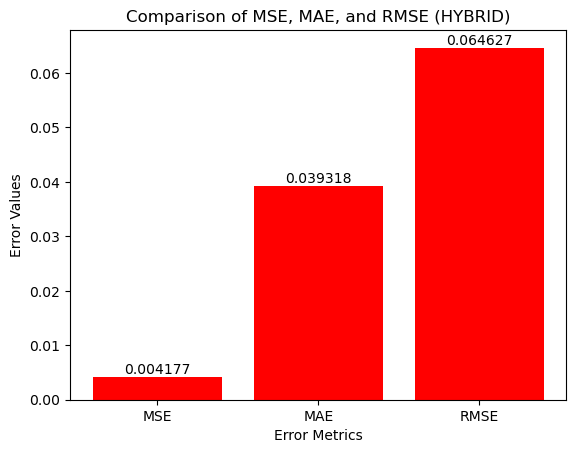

In [70]:
mse_hyb = metrics.mean_squared_error(y_test, hybrid_predictions1)
mae_hyb = metrics.mean_absolute_error(y_test, hybrid_predictions1)
rmse_hyb = np.sqrt(metrics.mean_squared_error(y_test, hybrid_predictions1))

# Labels for the x-axis
errors = ['MSE', 'MAE', 'RMSE']

# Values for the y-axis
error_values = [mse_hyb, mae_hyb, rmse_hyb]

colors = ['red']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Error Values')
plt.title('Comparison of MSE, MAE, and RMSE (HYBRID)')
plt.show()

In [71]:
#Train Random Forest and XGBoost models on the training data
rf_model_400 = RandomForestRegressor(n_estimators=400, max_depth=10, random_state=37)
xgb_Regressor_300 = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

# Create the ensemble regressor
ensemble_Regressor = VotingRegressor(
    estimators=[('xgb', xgb_Regressor_300), ('rf', rf_model_400)]
)

# Train the individual regressor
rf_model_400.fit(x_train, y_train)
xgb_Regressor_300.fit(x_train, y_train)

# Train the ensemble regressorD
ensemble_Regressor.fit(x_train, y_train)





C:\Users\LIM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LIM\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=300, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...)),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=400,
                                                   random_state=37))])

In [72]:
# Make predictions on the test data using ensemble model
ensemble_predictions = ensemble_Regressor.predict(x_test)
ensemble_predictions

array([0.02930666, 0.03119401, 0.05296493, ..., 0.04266668, 0.01101418,
       0.00859022])

In [77]:
print('Mean Squared Error (HYBRID):', metrics.mean_squared_error(y_test, ensemble_predictions))

Mean Squared Error (HYBRID): 0.00417664702311692


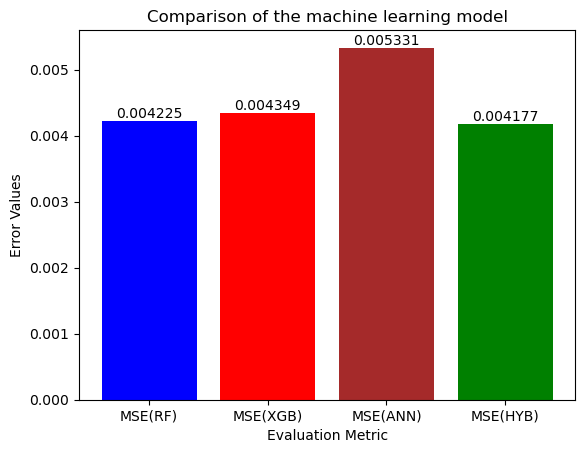

In [81]:
mse_rf = metrics.mean_squared_error(y_test, rf_400_preds)
mse_xgb = metrics.mean_squared_error(y_test, xgb_prediction_300)
mse_ann = metrics.mean_squared_error(y_test, ann_predictions)
mse_hyb = metrics.mean_squared_error(y_test, ensemble_predictions)

# Labels for the x-axis
errors = ['MSE(RF)', 'MSE(XGB)', 'MSE(ANN)', 'MSE(HYB)']

# Values for the y-axis
error_values = [mse_rf, mse_xgb, mse_ann, mse_hyb]

colors = ['blue', 'red', 'brown', 'green']

# Create the bar chart
plt.bar(errors, error_values, color = colors)
for i, value in enumerate(error_values):
    plt.text(i, value, f'{value:.6f}', ha='center', va='bottom')
# Add labels and title
plt.xlabel('Evaluation Metric')
plt.ylabel('Error Values')
plt.title('Comparison of the machine learning model')
plt.show()